In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
from pathlib import Path
import pandas as pd
import numpy as np
import requests
import time
import gmaps
from config import gkey
import scipy.stats as stats

# Import the .csv file as a DataFrame
sourcepath=Path("Resources/winemag-mean_noDups_Coordinates.csv")
df_wine=pd.read_csv(sourcepath)

df_wine=df_wine[df_wine['Lat']!=0]
df_wine.head()
#df_wine.count()

,country,province,avg points,avg price,Lat,Lng
0,Albania,Mirditë,88.000000,20.000000,41.764286,19.902051
1,Argentina,Mendoza Province,86.553467,23.420609,-32.889625,-68.852687
2,Argentina,Other,85.807453,21.211180,-38.416097,-63.616672
3,Armenia,Armenia,87.500000,14.500000,40.069099,45.038189
4,Australia,Australia Other,85.031315,11.814196,-31.951269,115.865997


In [2]:
gmaps.configure(api_key=gkey)

In [3]:
locations = df_wine[["Lat", "Lng"]]
locations.head()

,Lat,Lng
0,41.764286,19.902051
1,-32.889625,-68.852687
2,-38.416097,-63.616672
3,40.069099,45.038189
4,-31.951269,115.865997


In [4]:
wt_price = df_wine['avg price']
wt_price.head()

0    20.000000
1    23.420609
2    21.211180
3    14.500000
4    11.814196
Name: avg price, dtype: float64

In [5]:
wt_points = df_wine['avg points']
wt_points.head()

0    88.000000
1    86.553467
2    85.807453
3    87.500000
4    85.031315
Name: avg points, dtype: float64

In [6]:
fig = gmaps.figure()

heat_layer = gmaps.heatmap_layer(locations, weights=wt_price, 
                                 dissipating=False, max_intensity=100,
                                 point_radius = 1)

# Adjust heat_layer setting to help with heatmap dissipating on zoom
#heat_layer.dissipating = False
#heat_layer.max_intensity = 100
#heat_layer.point_radius = 1

serbia_coord = (44.016521, 21.005859)
fig = gmaps.figure(center=serbia_coord, zoom_level=4)

fig.add_layer(heat_layer)

fig

Figure(layout=FigureLayout(height='420px'))

In [7]:
#Heat map by average price
fig = gmaps.figure()

heat_layer = gmaps.heatmap_layer(locations, weights=wt_points, 
                                 dissipating=False, max_intensity=1000,
                                 point_radius = 1)

# Adjust heat_layer setting to help with heatmap dissipating on zoom
#heat_layer.dissipating = False
#heat_layer.max_intensity = 100
#heat_layer.point_radius = 1

#serbia_coord = (44.016521, 21.005859)
#fig = gmaps.figure(center=serbia_coord, zoom_level=4)

fig.add_layer(heat_layer)

fig

Figure(layout=FigureLayout(height='420px'))

In [27]:
#ANOVA test
#Ho:Same avg. prices among Portugal, Austria and Greece

pag_data = Path("Resources/winemag-data.csv")
pag_df = pd.read_csv(pag_data)
pag_df.head()

pag_price = pag_df.loc[pag_df["country"].isin(['Switzerland','England','Hungary','Austria','Greece','Portugal'])][['country','price']].dropna()
pag_price.head()

,country,price,points
64,Portugal,23.0,91
74,Portugal,15.0,91
91,Portugal,12.0,86
94,Portugal,10.0,86
110,Portugal,12.0,86


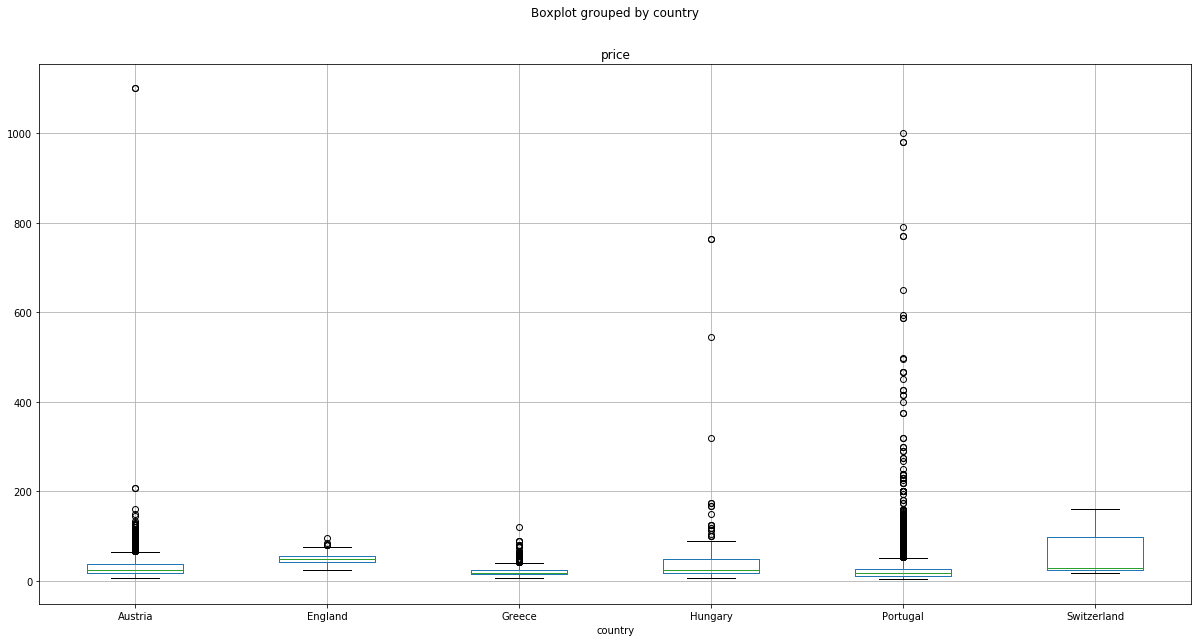

In [24]:
# Create a boxplot to compare means - avg price
pag_price.boxplot("price", by="country", figsize=(20, 10))

In [25]:
#ANOVA avg price
stats.f_oneway(*[pag_price[pag_price['country'] == i]['price'] for i in pag_price['country']])

F_onewayResult(statistic=26.34198438712256, pvalue=0.0)

In [34]:
#data for points
pag_points = (pag_df.loc[pag_df["country"]
                         .isin(['Germany','England','Hungary','Austria','Greece','Portugal','France','Italy'])]
                          [['country','points']].dropna())
pag_points.head()

,country,points
4,France,95
10,Italy,95
13,France,95
18,France,95
32,Italy,90


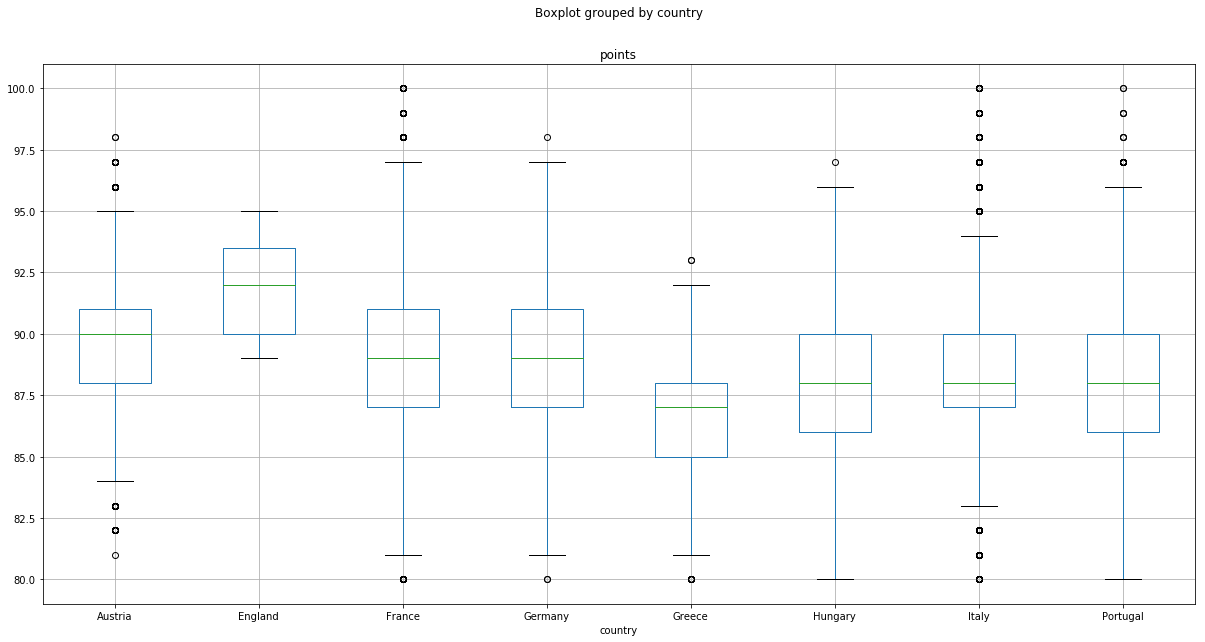

In [35]:
# Create a boxplot to compare means - avg price
pag_points.boxplot("points", by="country", figsize=(18, 10))

In [38]:
#ANOVA avg point
#stats.f_oneway(*[pag_points[pag_points['country'] == i]['points'] for i in pag_points['country']])